<h1>watlevpy Tutorial</h1>

<p>The basic object that is used by all the other clases is the <b>TS</b> class/object.</p>

<h2>Importing watlevpy</h2>
<p>I haven't made my package like an actual python package. So as for now, you need to get the github project and create your python files in the same directory where this file is located. To import walevpy you can do...</p>

In [2]:
import watlevpy.time_series as wal  #base TS object, TSFilter and TSReader
import watlevpy.plot.plot as wplot  #Used for plotting TS objects

<p>You can test that it worked by creating an empty TS object like</p>

In [2]:
EmptyTS=wal.TS();
print(EmptyTS);

  empty TS object  


<h2>TS class</h2>
<p>A TS object is a time series custom class that contains some basic metadata. To create a TS object one needs:</p>
<ul>
    <li>An array of the dates of the time series</li>
    <li>An array of corresponding values</li>
    <li>units</li>
    <li>The frequency of the data</li>
    <li>(optional) custom time delta for the frequency</li>
</ul>

<h3>dates</h3>
<p>All of the dates used in watlevpy should be given using the standard datetime library</p>

In [3]:
import datetime

someday=datetime.date(year=1959,month=3,day=5); # 5 of march of 1959
print(someday);

1959-03-05


<p>So an array of dates looks like:</p>

In [4]:
someweek=[];
for day in range(1,7+1):
    someweek.append(datetime.date(1959,1,day)); #first week of January of 1959

print(someweek);

[datetime.date(1959, 1, 1), datetime.date(1959, 1, 2), datetime.date(1959, 1, 3), datetime.date(1959, 1, 4), datetime.date(1959, 1, 5), datetime.date(1959, 1, 6), datetime.date(1959, 1, 7)]


<h3>units and frequency</h3>
<p>Units can be any string, sor for example "ft" or "kg". The frequency can only be one of "daily","weekly","30monthly","365yearly","monthly","yearly","custom". </p>

<h3>example of a TS object</h3>
<p>Let's make a TS object now. We need dates, values for those dates, units and the frequency. </p>

In [4]:
#we will use the first week of december of 2000
dec_week=[];
for day in range(1,7+1):
    dec_week.append(datetime.date(2000,12,day));

#now some values
values=[1,2,3,5,1,2,3];

#and now the TS object
weekTS=wal.TS(values,dec_week,"ft","daily");
print(weekTS);

time: 2000-12-01,..., 2000-12-07 
frequency: daily 
units: ft 
lenght: 7 
values: 1,...,3


<p>You can also extract the dates or values of a TS object like</p>

In [6]:
thedates=weekTS.get_time_window();
print(thedates);

thevalues=weekTS.get_time_window_dates();
print(thevalues);

[1, 2, 3, 5, 1, 2, 3]
[datetime.date(2000, 12, 1), datetime.date(2000, 12, 2), datetime.date(2000, 12, 3), datetime.date(2000, 12, 4), datetime.date(2000, 12, 5), datetime.date(2000, 12, 6), datetime.date(2000, 12, 7)]


<h3>plotting a TS object</h3>
<p>now lets visualize it, you can plot any TS object using the plotTS function from the ploting library</p>

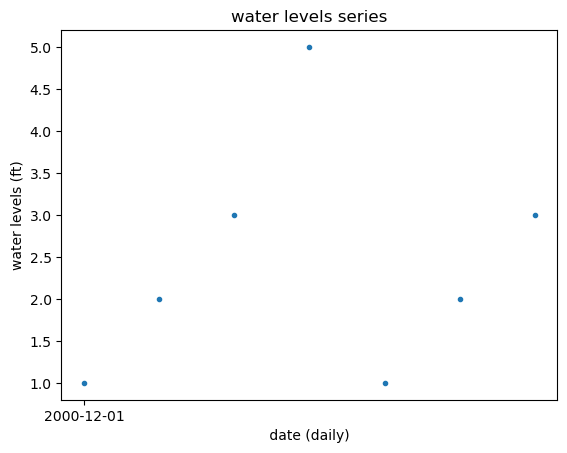

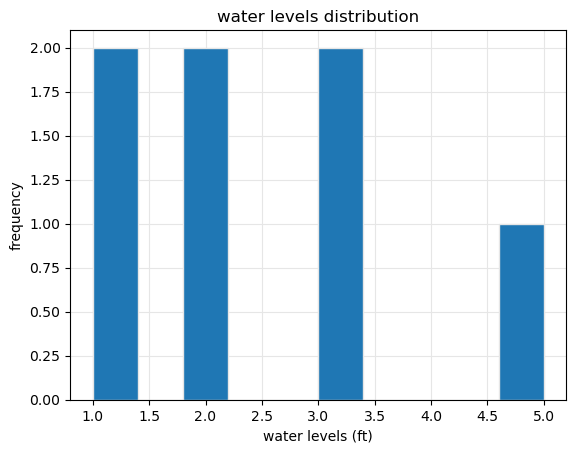

In [7]:
wplot.plotTS(weekTS);

<p>There are a couple of options to customize it a little. So to get a line graph instead, plot only a range of dates and change the data name to "pepitos" we do</p>

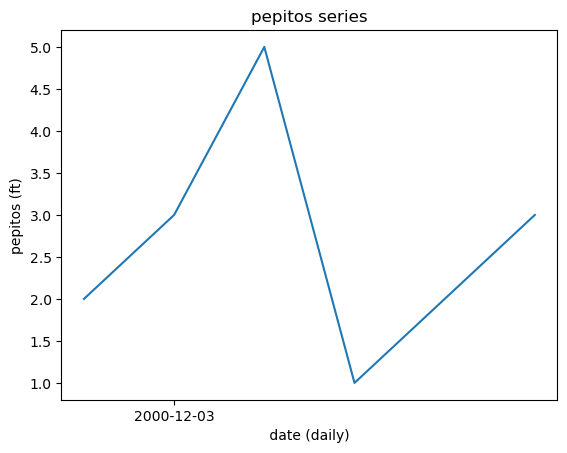

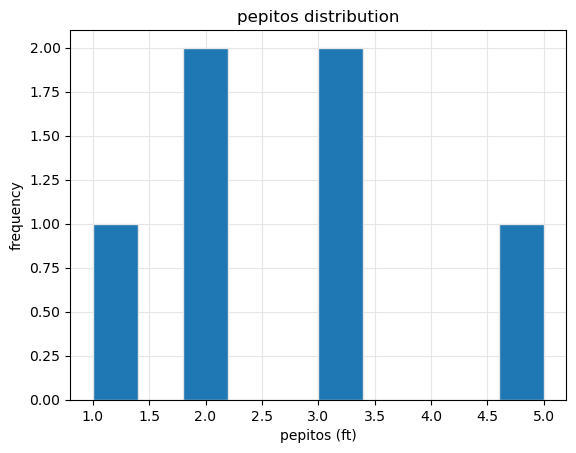

In [8]:
start_date=datetime.date(2000,12,2);
end_date=datetime.date(2000,12,7);

wplot.plotTS(weekTS,start_date,end_date,2,"pepitos");

<h2>The TSReader class</h2>
<p>Most times we will be reading a time series from a file. The TSReader has (will have) functions to read from files in different formats. Look for inside the folder <i>data_files</i> and open <i>smalltest.csv</i> with a text editor or excel.</p>

<p>Now lets open this file using the TSReader class.</p>

In [10]:
myTS=wal.TSReader.from_csvfile(csvfile="./data_files/smalltest.csv",headers=True,dateformat="%m/%d/%Y %H:%M");

There are 7 wrong format water levels (possibly missing dates)


and lets see how it looks

time: 1878-10-02,..., 1878-12-01 
frequency: daily 
units: ft 
lenght: 54 
values: 590.17,...,587.67


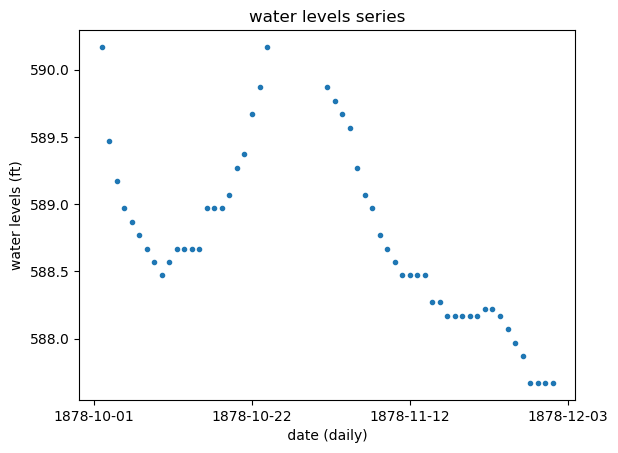

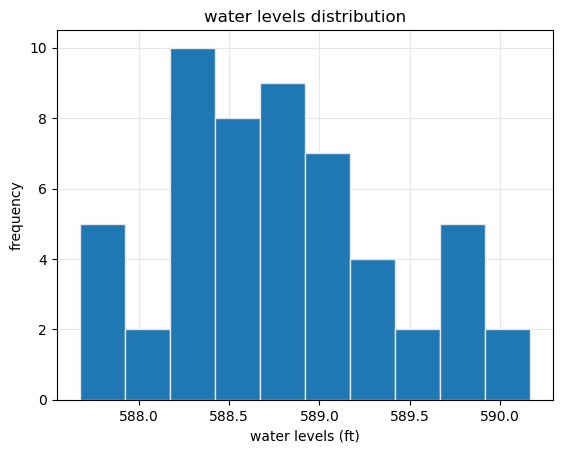

In [11]:
print(myTS);
wplot.plotTS(myTS);

 <h2>The TSFilter class</h2>
 <p>In many situations we want to extract specific periods of data or use monthly averages, maybe the peak values, POTs, frequencies, or apply some other filter of the data. The TSFilter class is supposed to contain most functions with this purpose. </p>

The following is an example of how to extract max monthly values and also weekly averages

closest date found to 1878-10-01 is: 1878-10-02
closest date found to 1878-10-31 is: 1878-10-24
closest date found to 1878-12-31 is: 1878-12-01
time: 1878-10-01,..., 1878-12-01 
frequency: monthly 
units: ft 
lenght: 3 
values: 590.17,...,587.67


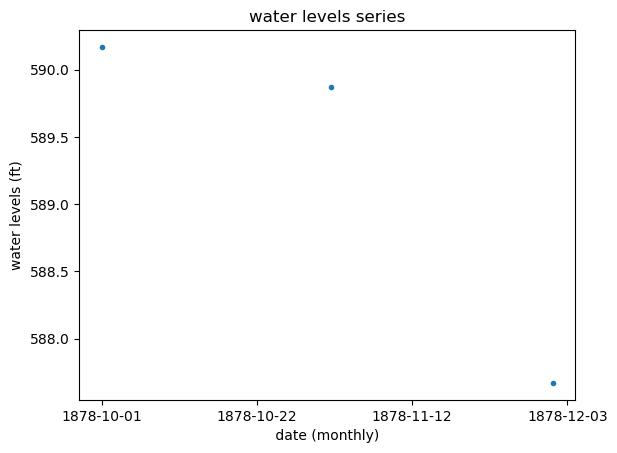

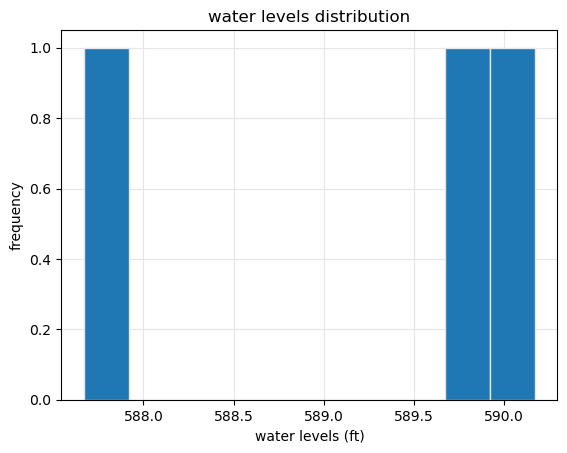

In [17]:
#Filter the monthly max peaks 
monthMax=wal.TSFilter.peaks_from_TS(myTS,"monthly");
print(monthMax);
wplot.plotTS(monthMax);

closest date found to 1878-10-29 is: 1878-10-24
closest date found to 1878-10-30 is: 1878-11-01
closest date found to 1878-12-03 is: 1878-12-01
time: 1878-10-02,..., 1878-11-27 
frequency: weekly 
units: ft 
lenght: 9 
values: 589.1557142857142,...,587.71


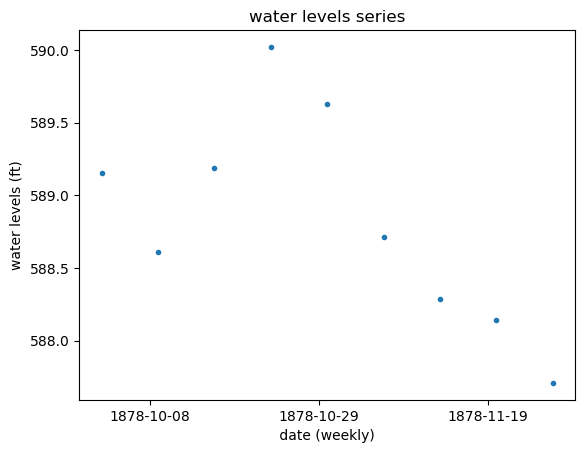

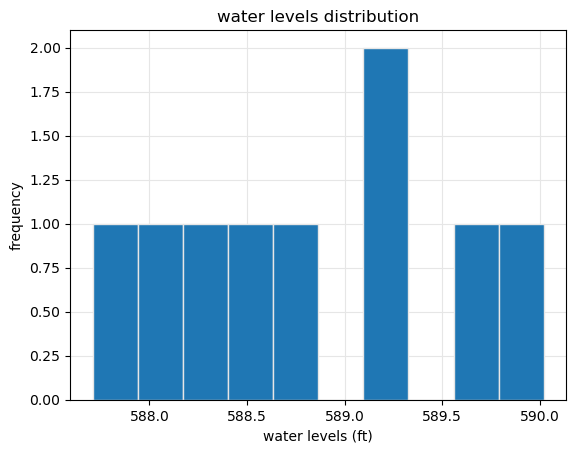

In [18]:
#Filter the weekly averages 
weekAver=wal.TSFilter.averages_from_TS(myTS,"weekly");
print(weekAver);
wplot.plotTS(weekAver);